<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_excel('/content/carprice.xlsx')
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


<Axes: >

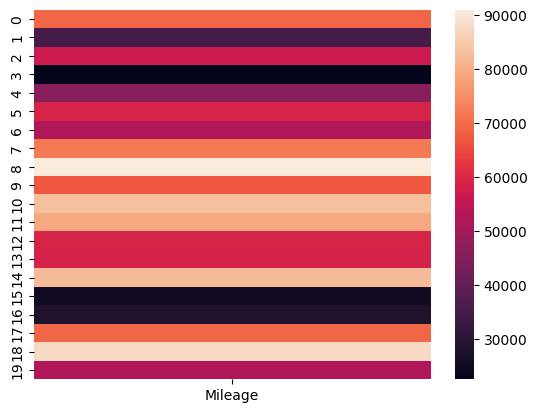

In [40]:
data = df.drop(['Age(yrs)','Sell Price($)'],axis=1)
sns.heatmap(data)

[]

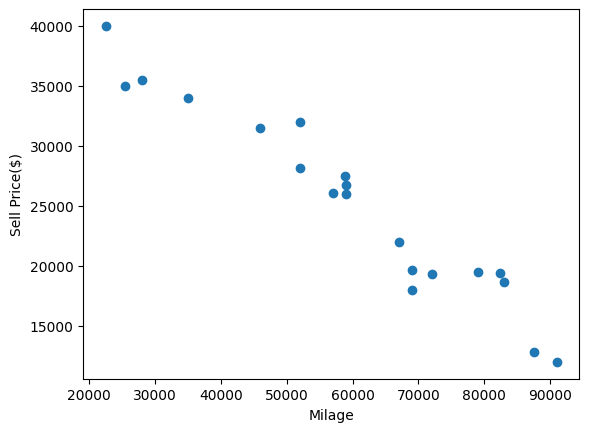

In [41]:
plt.xlabel('Milage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.plot()

[]

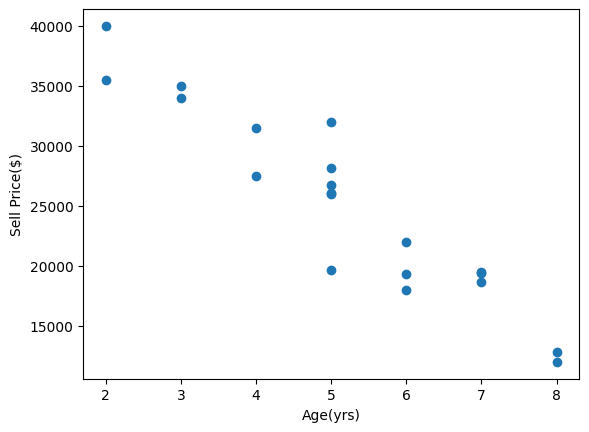

In [42]:
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])
plt.plot()

In [43]:
X = df[['Mileage','Age(yrs)']]
y = df['Sell Price($)']

In [44]:
X.head()

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4


In [45]:
y.head()

0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell Price($), dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [47]:
X_train

,Mileage,Age(yrs)
13,58780,4
7,72000,6
16,28000,2
19,52000,5
10,83000,7
17,69000,5
5,59000,5
12,59000,5
15,25400,3
8,91000,8


In [48]:
from sklearn.linear_model import LinearRegression
obj = LinearRegression()

In [49]:
obj.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = obj.predict(X_test)

In [51]:
y_test

14    19400
0     18000
3     40000
18    12800
Name: Sell Price($), dtype: int64

In [52]:
obj.score(X_test,y_test)

0.9268736191326196

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean Squared Error',mse)
print('Mean Absolute Error',mae)
print('R-Squared',r2)

Mean Squared Error 7864559.446334594
Mean Absolute Error 2628.778560041349
R-Squared 0.9268736191326196


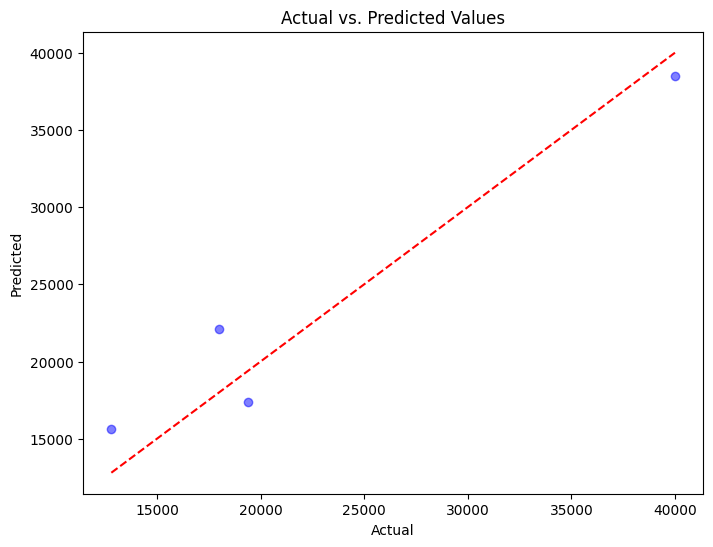

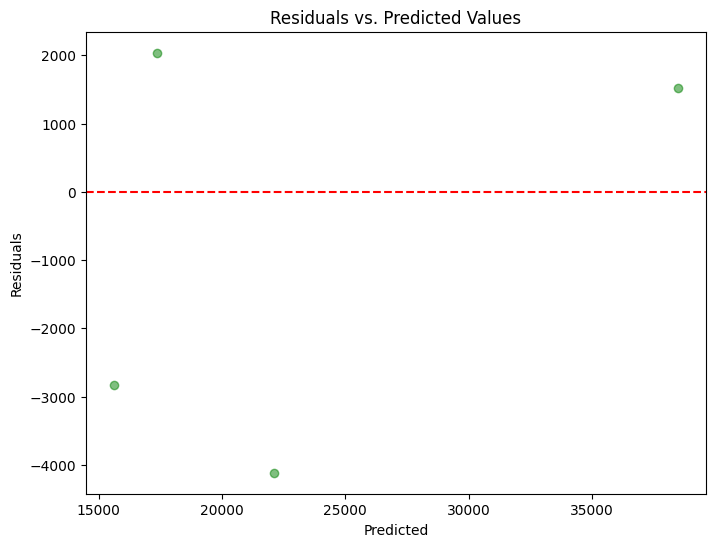

In [59]:
import matplotlib.pyplot as plt

# Visualize the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plot residuals vs. predicted values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

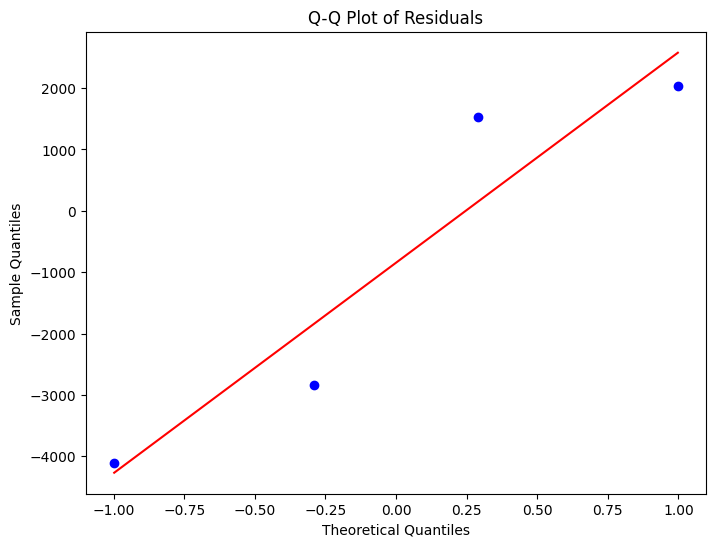

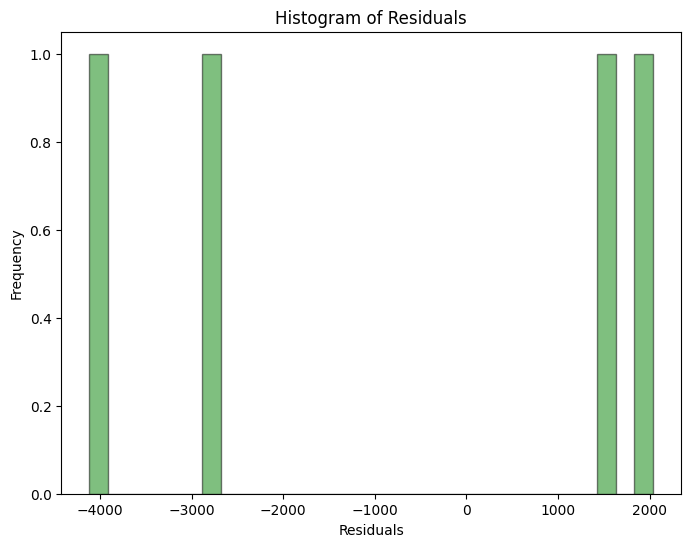

Cross-Validation Scores: [0.92000364 0.69163583 0.90987375 0.97253625 0.60423537]
Mean CV Score: 0.8196569665768563


In [63]:
from scipy.stats import probplot

# Generate Q-Q plot of residuals
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.5, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Evaluate model performance using cross-validation or other techniques
# Example: Perform cross-validation to assess model stability
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(obj, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))